In [2]:
# define a pytensor Op for our likelihood function
from pl_temp_fit import Exp_data_utils, fit_EL_exp_EMCEE

import numpy as np
import os
import matplotlib.pyplot as plt
import datetime
import os
os.chdir('/rds/general/user/ma11115/home/pl_temp_fit/') 

['experiemental_data/blends/PM6Y61_1PL.csv', 'experiemental_data/blends/PM6Y61_1EL.csv']


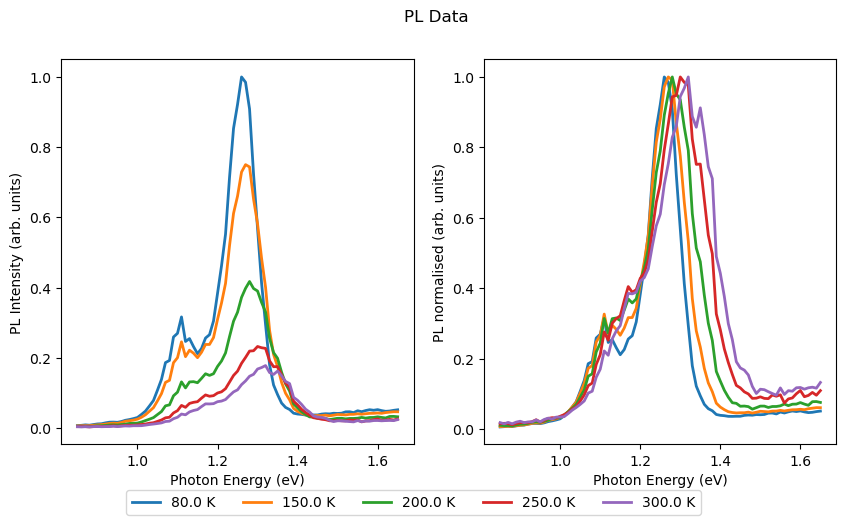

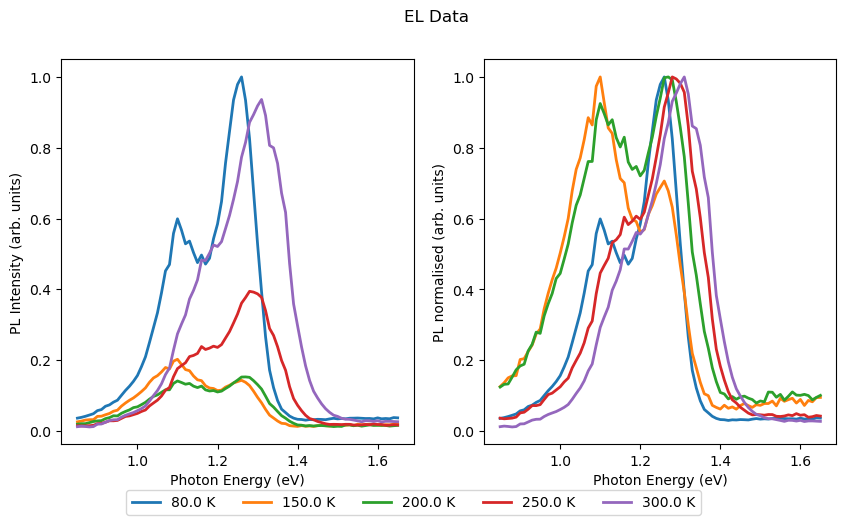

In [5]:
# import the data and plot them
import importlib
import glob
csv_files = glob.glob('experiemental_data/blends/*.csv')
print(csv_files)
csv_name_PL=csv_files[0]#3 for y6, 18 for ITIC,12 for L8BO
csv_name_EL=csv_files[1]#3 for y6, 18 for ITIC,12 for L8BO

Exp_data_PL, temperature_list_PL, hws_PL = Exp_data_utils.read_data(csv_name_PL)
fig,ax = Exp_data_utils.plot_PL_data(Exp_data_PL, temperature_list_PL, hws_PL,title="PL Data")
Exp_data_EL, temperature_list_EL, hws_EL = Exp_data_utils.read_data(csv_name_EL)
fig,ax = Exp_data_utils.plot_PL_data(Exp_data_EL, temperature_list_EL, hws_EL,title="EL Data")

In [57]:
#initialise parameters for the model
number_free_parameters , sigma, Temp_std_err, hws_std_err, relative_intensity_std_error_PL,relative_intensity_std_error_EL = 5, 0.001, 10, 0.005, 0.05,0.1

model_config = {
        "number_free_parameters": number_free_parameters,
        "sigma": sigma,
        "Temp_std_err": Temp_std_err,
        "hws_std_err": hws_std_err,
        "relative_intensity_std_error_PL": relative_intensity_std_error_PL,
        "relative_intensity_std_error_EL": relative_intensity_std_error_EL,
    }
X = {'temperature_list_PL':temperature_list_PL, 'hws_PL':hws_PL,
     'temperature_list_EL':temperature_list_EL, 'hws_EL':hws_EL}
print(f"size of hw is {hws_PL.shape}")
print(f"size of temperature_list is {temperature_list_PL.shape}")
date = datetime.datetime.now().strftime("%Y_%m_%d")
# generate the data
save_folder = (
    f"fit_experimental_emcee_EL/{date}/{csv_name_PL.split('/')[-1]}/"
    + " sigma=" + str(sigma)
    + " temperature_list=" + str(len(temperature_list_PL))
    + " number_free_parameters=" + str(number_free_parameters)
    + " Temp_std_err="+str(Temp_std_err)
    + " hws_std_err="+str(hws_std_err)
    + " relative_intensity_std_error_PL="+str(relative_intensity_std_error_PL)
    + " relative_intensity_std_error_EL="+str(relative_intensity_std_error_EL)
)
os.makedirs(save_folder, exist_ok=True)
# get initial covariance matrix
#get covariance matrix for the experimental data
init_params = [hws_PL[np.argmax(Exp_data_PL[:,0])], 0.02, 0.1, 0.1, 0.16]
#co_var_mat_PL = fit_EL_exp_EMCEE.plot_generated_data( temperature_list_PL, hws_PL, save_folder, model_config, savefig=True,true_parameters=init_params)
#plot data with variance
#variance_data = co_var_mat_PL.diagonal().reshape(hws_PL.shape[0],-1).copy()
#fig,axis = Exp_data_utils.plot_PL_data_with_variance(Exp_data_PL, temperature_list_PL, hws_PL, variance_data, save_folder)
#for ax in axis:
 #   ax.set_ylim(0, 1.1)

size of hw is (81,)
size of temperature_list is (5,)


shape of mean value plot is (81, 5)
shape of mean value plot is (81, 5)


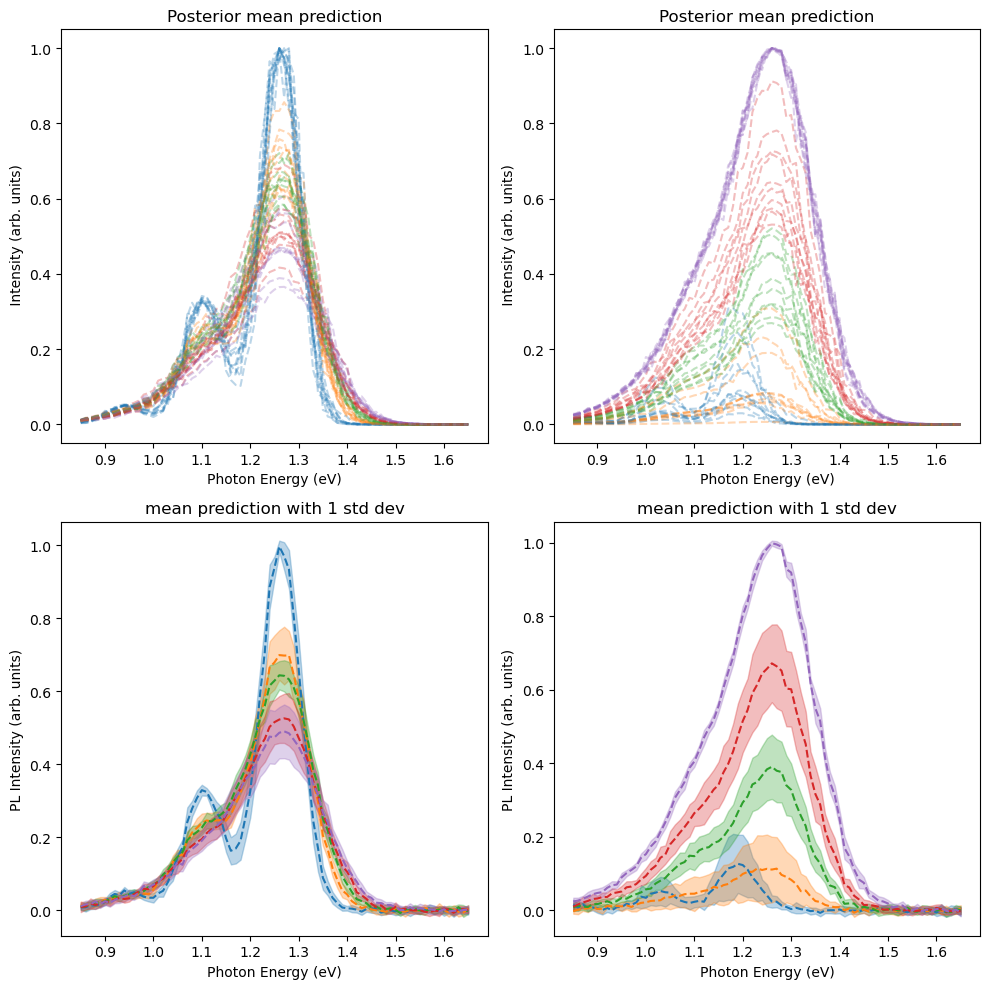

In [43]:
#get the variance of the data and plot it
LE_params = [1.37,1e-03,7.87e-02,1.1e-01, 1.59e-01]
init_params = [1.3, 10, 0.1, 0.1, 0.16,-2]
co_var_mat_PL,co_var_mat_EL,variance_EL,variance_PL= fit_EL_exp_EMCEE.plot_generated_data(temperature_list_EL, hws_EL,temperature_list_PL,hws_PL, save_folder, model_config,LE_params, savefig=True,true_parameters=init_params)


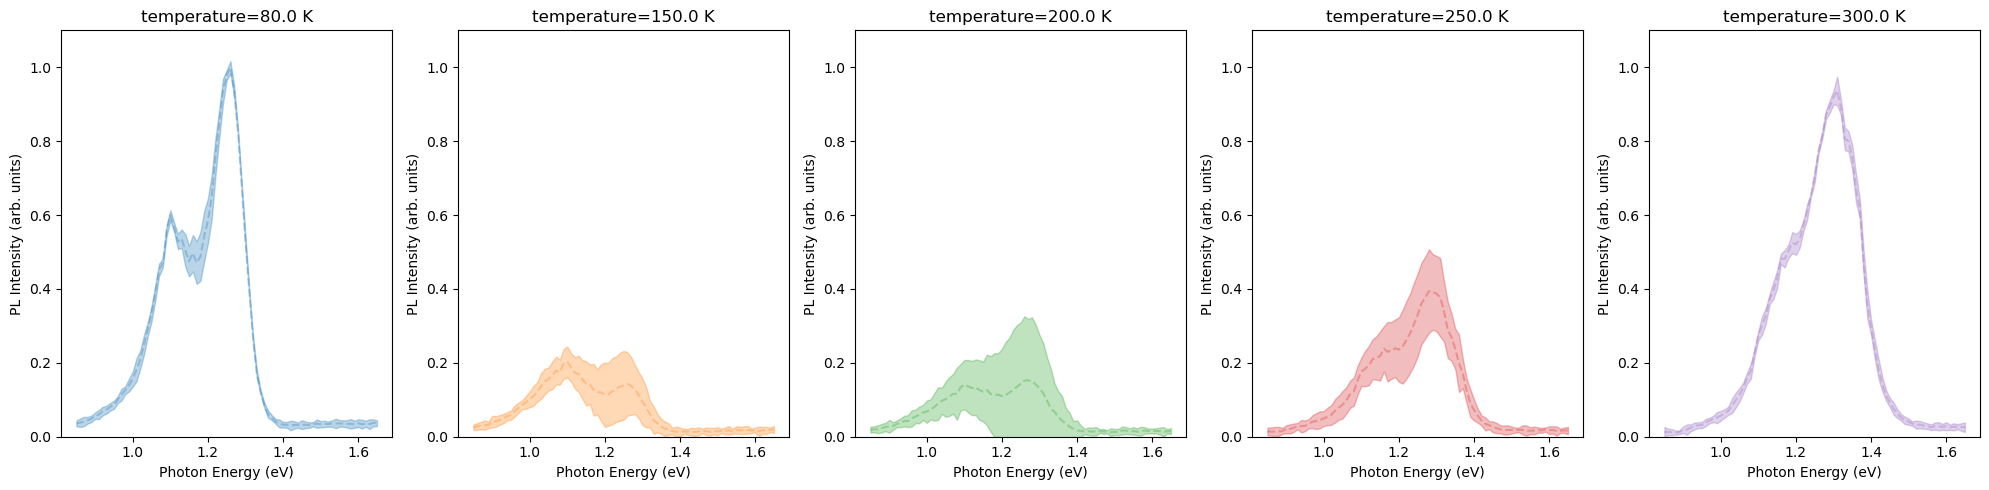

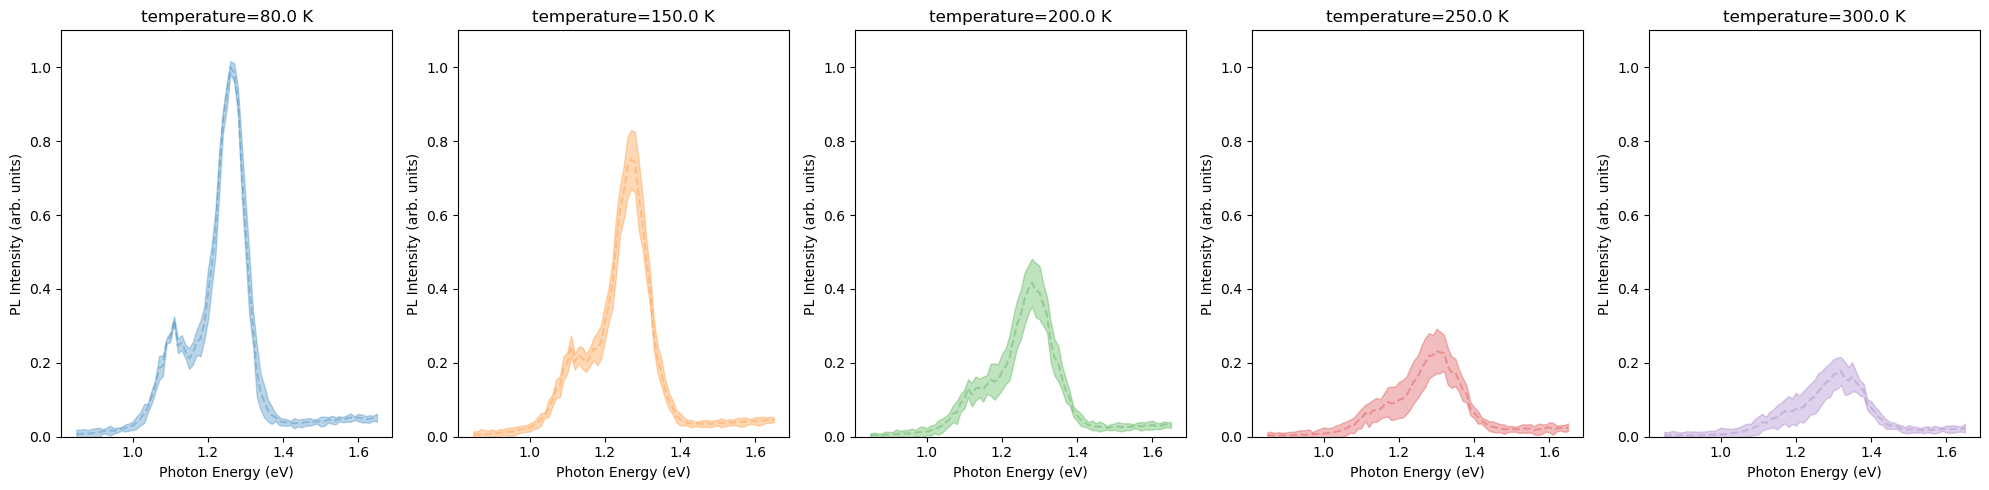

In [41]:
fig,axis = Exp_data_utils.plot_PL_data_with_variance(Exp_data_EL, temperature_list_EL, hws_EL, variance_EL, save_folder)
for ax in axis:
   ax.set_ylim(0, 1.1)
fig,axis = Exp_data_utils.plot_PL_data_with_variance(Exp_data_PL, temperature_list_PL, hws_PL, variance_PL, save_folder)
for ax in axis:
    ax.set_ylim(0, 1.1)

In [70]:
soln.x

array([ 1.30976344,  9.17590045,  0.18325124,  0.04639578,  0.16503427,
       -1.60488045])

In [52]:
LE_params = [1.37159386e+00, 1.00000000e-03,7.87203363e-02,1.12738205e-01, 1.59916771e-01]
init_params = [1.3, 10, 0.1, 0.1, 0.16,-2]
soln = fit_EL_exp_EMCEE.get_maximum_likelihood_estimate( Exp_data_EL,Exp_data_PL, co_var_mat_PL,co_var_mat_EL ,X,save_folder,LE_params,init_params)

KeyboardInterrupt: 

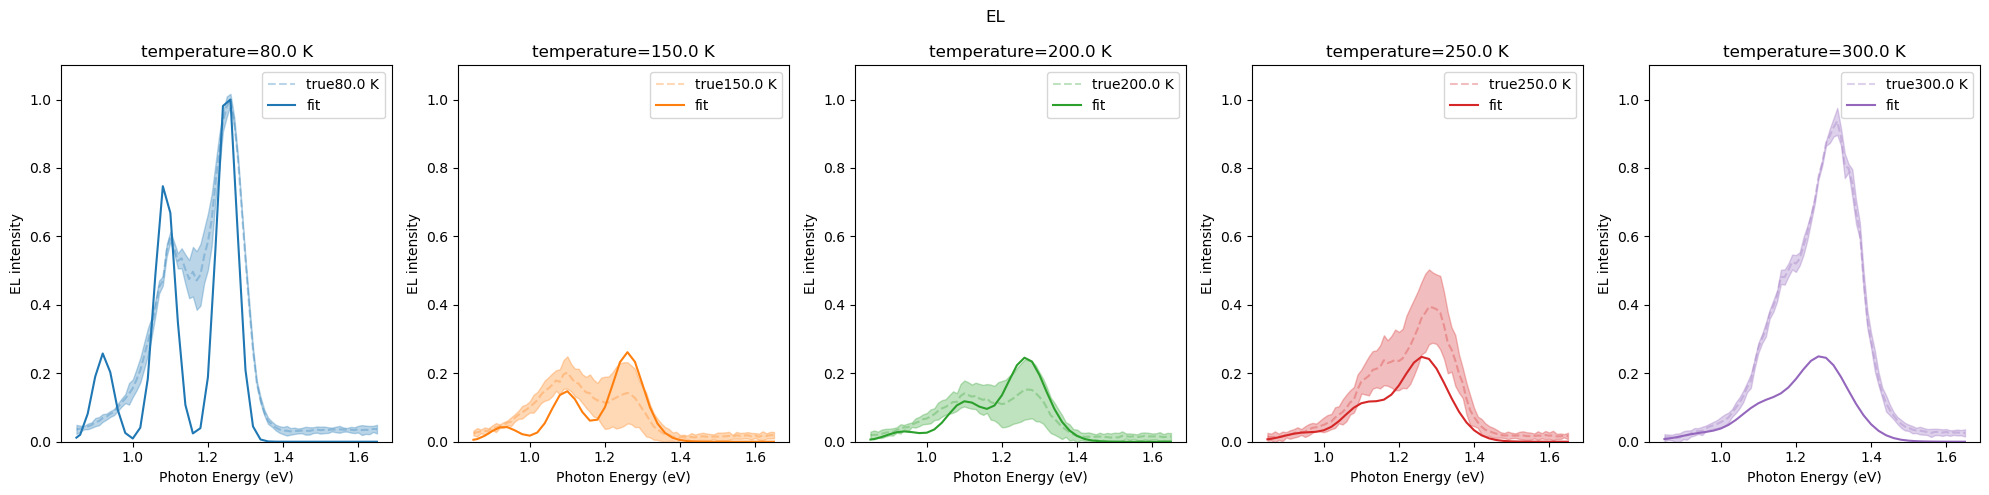

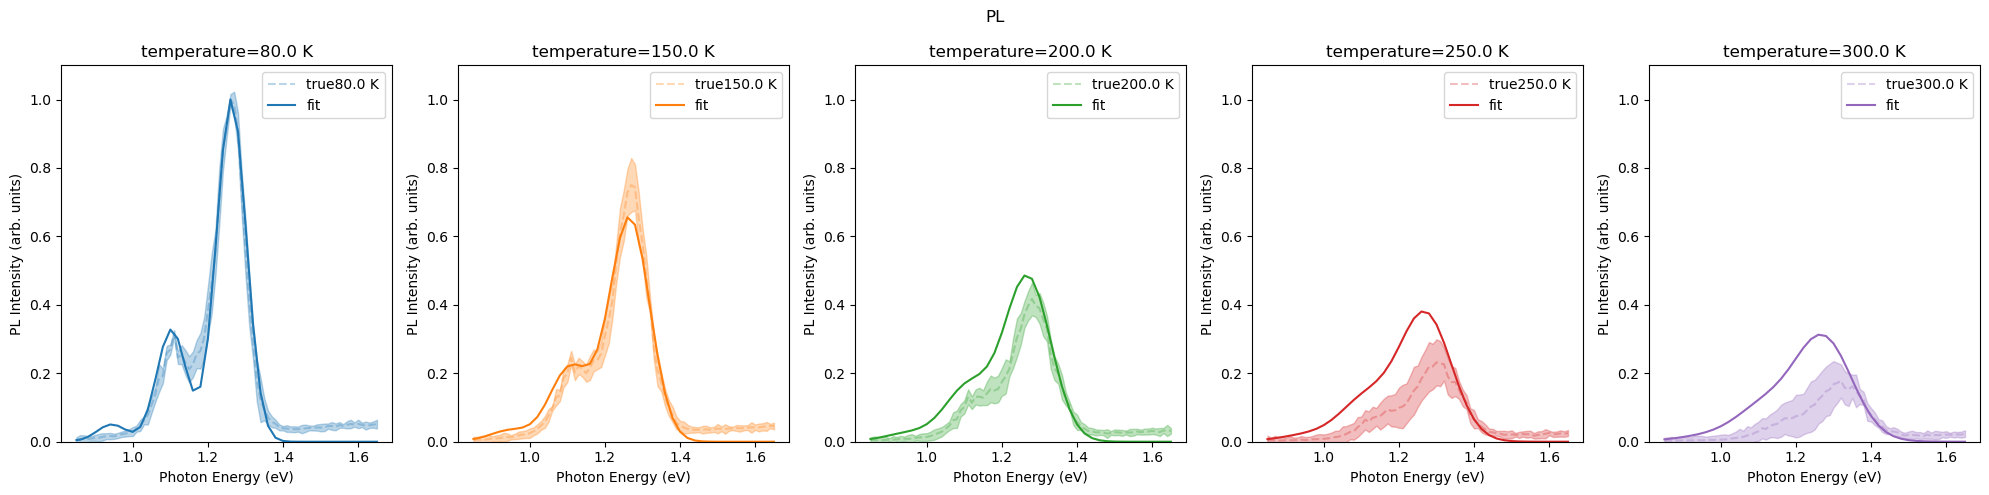

In [69]:
true_parameters = soln.x
model_data_EL, model_data_PL= fit_EL_exp_EMCEE.el_trial(list(true_parameters), temperature_list_EL, hws_EL,temperature_list_PL,hws_PL,LE_params)
truemodel_pl = model_data_PL/np.max(model_data_PL.reshape(-1,1))
truemodel_el = model_data_EL/np.max(model_data_EL.reshape(-1,1))
fig,axis = Exp_data_utils.plot_PL_data_with_variance(Exp_data_EL, temperature_list_EL, hws_EL, variance_EL, save_folder)

for i,axes  in enumerate(axis): 
    axes.plot(hws_EL,truemodel_el[:,i],label='fit',color="C" + str(i) )
    axes.legend()
    axes.set_ylim(0,1.1)
    axes.set_ylabel("EL intensity")
fig.suptitle("EL")
fig.tight_layout(h_pad=0.0)
fig,axis = Exp_data_utils.plot_PL_data_with_variance(Exp_data_PL, temperature_list_PL, hws_PL, variance_PL, save_folder)

for i,axes  in enumerate(axis): 
    axes.plot(hws_PL,truemodel_pl[:,i],label='fit',color="C" + str(i) )
    axes.legend()
    axes.set_ylim(0,1.1)
fig.suptitle("PL")
fig.tight_layout(h_pad=0.0)

In [63]:
import importlib
importlib.reload(fit_EL_exp_EMCEE)

sampler = fit_EL_exp_EMCEE.run_sampler_single(save_folder, soln, Exp_data_EL,Exp_data_PL, co_var_mat_EL,co_var_mat_PL,LE_params, X,nsteps=10)

Initial size: 0


  0%|          | 0/10 [00:00<?, ?it/s]/rds/general/user/ma11115/home/anaconda3/envs/pymc_env/lib/python3.11/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 10/10 [02:56<00:00, 17.68s/it]

single process took 194.6 seconds


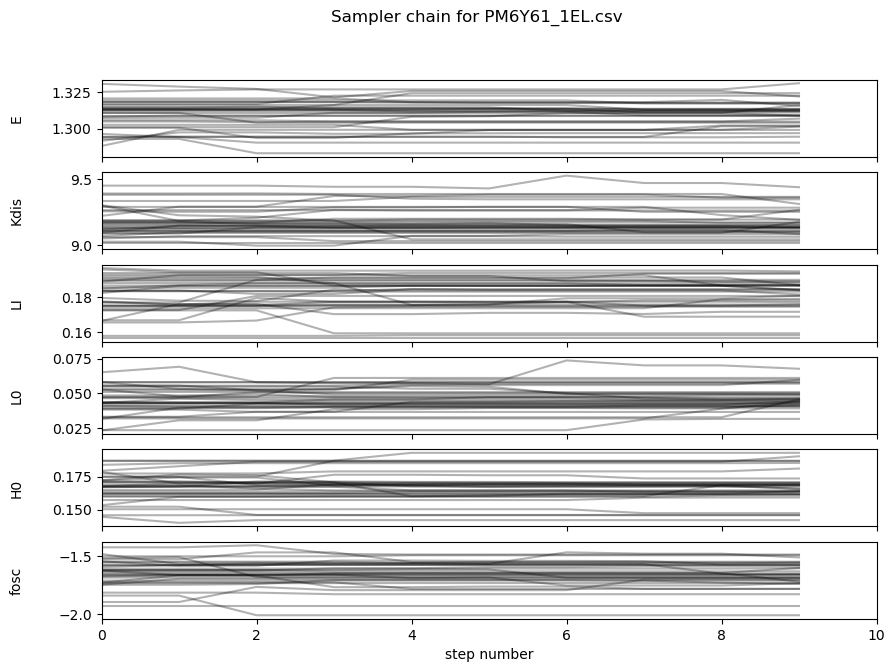

In [65]:
fig, axes = plt.subplots(6, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["E", "Kdis", "LI", "L0", "H0","fosc"]
ndim = len(labels)
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)
axes[-1].set_xlabel("step number")
fig.suptitle(f"Sampler chain for {csv_name.split('/')[-1]}")
fig.show()

In [66]:
soln.x

array([ 1.30976344,  9.17590045,  0.18325124,  0.04639578,  0.16503427,
       -1.60488045])